In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json

import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

from IPython.core.display import HTML, display
np.random.seed(123)

C:\Users\User\AppData\Local\Temp\ipykernel_8640\3674997650.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


1.  1.1

In [181]:
wat = pd.read_csv("C:/Users/User/Desktop/Python/data/WAT.csv")
anss = pd.read_csv("C:/Users/User/Desktop/Python/data/ANSS.csv")
fast= pd.read_csv("C:/Users/User/Desktop/Python/data/FAST.csv")
cl = pd.read_csv("C:/Users/User/Desktop/Python/data/CL.csv")

In [182]:
wat["diff"] = wat["Close"] - wat["Adj Close"]
watd = wat[wat["diff"] != 0]
print(watd["diff"])

Series([], Name: diff, dtype: float64)


In [183]:
anss["diff"] = anss["Close"] - anss["Adj Close"]
anssd = anss[anss["diff"] != 0]
print(anssd["diff"])

Series([], Name: diff, dtype: float64)


In [184]:
fast["diff"] = fast["Close"] - fast["Adj Close"]
fastd = fast[fast["diff"] != 0]
print(fastd["diff"])

0      2.344952
1      2.356869
2      2.361834
3      2.406513
4      2.406513
         ...   
924    0.274158
925    0.277489
926    0.277950
927    0.276260
928    0.279999
Name: diff, Length: 929, dtype: float64


In [185]:
cl["diff"] = cl["Close"] - cl["Adj Close"]
cld = cl[cl["diff"] != 0]
print(cld["diff"])

0       7.057068
1       7.034088
2       6.940254
3       6.954597
4       6.883759
          ...   
1049    0.445946
1050    0.450867
1051    0.449081
1052    0.454163
1053    0.449997
Name: diff, Length: 1054, dtype: float64


In the last two companies there are differences, but in the first two companies there are not differences. It might mean that when markets are close there is market trading (with differences), but where are not differences it means that markets are close there is not market trading.

1. 1.2

In [186]:
wat.nlargest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
960,2021-09-08,428.220001,419.869995,421.700012,424.700012,259800,424.700012,0.0


In [187]:
wat.nsmallest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
591,2020-03-23,174.009995,154.389999,173.570007,162.360001,635400,162.360001,0.0


In [188]:
anss.nlargest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
1036,2021-12-27,411.220001,402.829987,404.679993,411.220001,183100,411.220001,0.0


In [189]:
anss.nsmallest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
279,2018-12-24,141.119995,136.800003,139.610001,136.809998,333900,136.809998,0.0


In [190]:
fast.nlargest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
1038,2021-12-29,64.589996,63.810001,63.84,64.419998,1389200.0,64.419998,0.0


In [191]:
fast.nsmallest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
0,2017-11-13,23.83,23.549999,23.665001,23.615,3482600.0,21.270048,2.344952


In [192]:
cl.nlargest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
1040,2021-12-31,85.400002,84.589996,84.589996,85.339996,2940200.0,84.878922,0.461075


In [193]:
cl.nsmallest(1, ["Adj Close"])

,Date,High,Low,Open,Close,Volume,Adj Close,diff
241,2018-10-29,59.810001,57.41,59.130001,57.880001,9710000.0,53.612835,4.267166


1.  1.3

In [194]:
wat["Log Adj Close"] = np.log(wat["Adj Close"]) 
wat["Log Adj Close"].describe()

count    1259.000000
mean        5.500895
std         0.236000
min         5.089816
25%         5.296265
50%         5.410351
75%         5.730700
max         6.051383
Name: Log Adj Close, dtype: float64

In [195]:
anss["Log Adj Close"] = np.log(anss["Adj Close"]) 
anss["Log Adj Close"].describe()

count    1259.000000
mean        5.497763
std         0.311067
min         4.918593
25%         5.197115
50%         5.527960
75%         5.785301
max         6.019128
Name: Log Adj Close, dtype: float64

In [196]:
fast["Log Adj Close"] = np.log(fast["Adj Close"]) 
fast["Log Adj Close"].describe()

count    1258.000000
mean        3.627626
std         0.318324
min         3.057300
25%         3.335574
50%         3.622237
75%         3.927303
max         4.165424
Name: Log Adj Close, dtype: float64

In [197]:
cl["Log Adj Close"] = np.log(cl["Adj Close"]) 
cl["Log Adj Close"].describe()

count    1259.000000
mean        4.250340
std         0.113097
min         3.981788
25%         4.161291
50%         4.250158
75%         4.348427
max         4.441226
Name: Log Adj Close, dtype: float64

1. 1.4

In [198]:
wat["Log Adj Close"].idxmax()

960

In [199]:
anss["Log Adj Close"].idxmax()

1036

In [200]:
fast["Log Adj Close"].idxmax()

1038

In [201]:
cl["Log Adj Close"].idxmax()

1040

In [202]:
wat["Log Adj Close"].idxmin()

591

In [203]:
anss["Log Adj Close"].idxmin()

279

In [204]:
fast["Log Adj Close"].idxmin()

0

In [205]:
cl["Log Adj Close"].idxmin()

241

1. 1.5 later return to this one

1. 1.6

In [206]:
wat["Adj Close"].iat[-1] - wat["Adj Close"][0]

137.2100067138672

In [207]:
anss["Adj Close"].iat[-1] - anss["Adj Close"][0]

104.84001159667969

In [208]:
fast["Adj Close"].iat[-1] - fast["Adj Close"][0]

30.52995109558106

In [209]:
cl["Adj Close"].iat[-1] - cl["Adj Close"][0]

7.927070617675781

The highest total return over the whole period belongs to WAT.

1. 1.7

<AxesSubplot:xlabel='Date'>

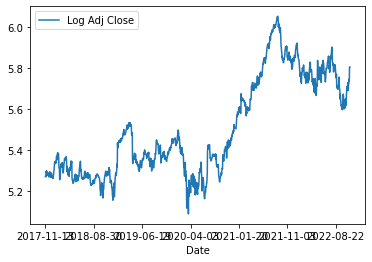

In [210]:
wat.plot(x="Date", y="Log Adj Close")

<AxesSubplot:xlabel='Date'>

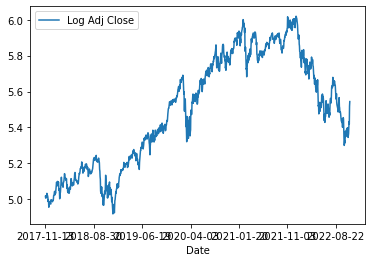

In [211]:
anss.plot(x="Date", y="Log Adj Close")

<AxesSubplot:xlabel='Date'>

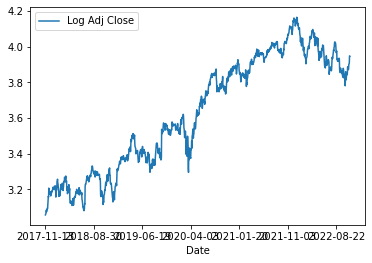

In [212]:
fast.plot(x="Date", y="Log Adj Close")

<AxesSubplot:xlabel='Date'>

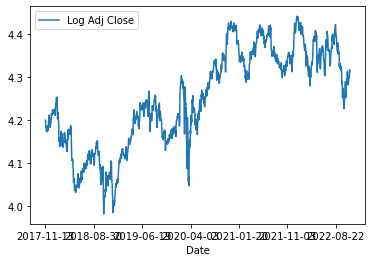

In [213]:
cl.plot(x="Date", y="Log Adj Close")

1. 1.8

array([[<AxesSubplot:title={'center':'Log Adj Close'}>]], dtype=object)

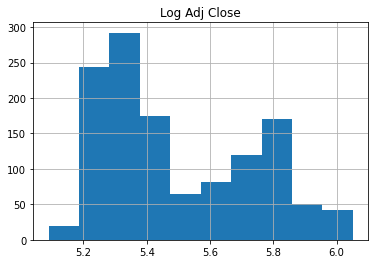

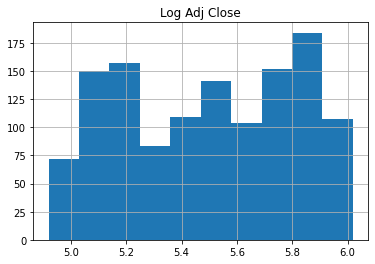

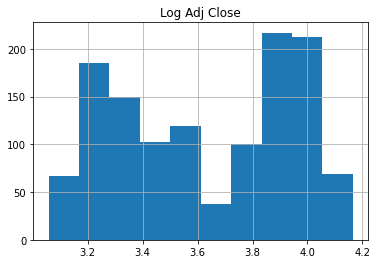

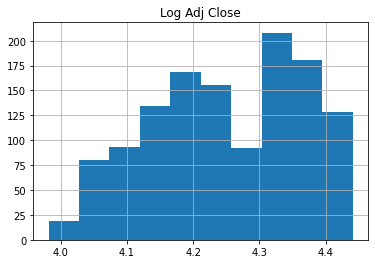

In [214]:
wat.hist(column="Log Adj Close")
anss.hist(column="Log Adj Close")
fast.hist(column="Log Adj Close")
cl.hist(column="Log Adj Close")

2. download

In [215]:
com = pd.read_csv("C:/Users/User/Downloads/companies_no_subindustry.csv")
com

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


2. 2.1

In [216]:
com_1= com[pd.to_numeric(com["included"], errors='coerce').isna()& com["included"].notna()]
com_1

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


And hence there are 456 companies "included" and 47 not included (503 - 456)

2. 2.2

In [217]:
pd.to_datetime (com["included"], dayfirst=True,errors='coerce')

0     1976-08-09
1     2017-07-26
2     1964-03-31
3     2012-12-31
4     2018-05-31
         ...    
498   1997-10-06
499   2019-12-23
500   2001-08-07
501   2001-06-22
502   2013-06-21
Name: included, Length: 503, dtype: datetime64[ns]

2. 2.3

In [218]:
com_1.plot.pie("GICS Sector")

TypeError: pie() takes 1 positional argument but 2 were given

2. 2.5

In [ ]:
sub = pd.read_csv("C:/Users/User/Downloads/companies_subindustry.csv")
sub

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [ ]:
tog = com.merge(sub, on = "Symbol", how = "inner")
tog

,Symbol,Security,GICS Sector,hq,included,Founded,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,Health Care Equipment
...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873,Regional Banks
